In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 103.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 108.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 187.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
import os 
import torch 
import torch.nn as nn
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
from torchinfo import summary
from torchvision.transforms import transforms
import matplotlib
import matplotlib.pyplot as plt

In [6]:
img_transform = transforms.Compose([
    transforms.ToTensor(),    
])

In [7]:
train_data = datasets.CIFAR10(  # Loads the CIFAR-10 training dataset
    root="./data/train",  # Directory where the dataset is stored
    train=True,  # Specifies that we want the training set
    download=True,  # Downloads the dataset if it is not already available
    transform=img_transform  # Applies the defined transformations to the dataset
)

test_data = datasets.CIFAR10(  # Loads the CIFAR-10 test dataset
    root="./data/test",  # Directory where the dataset is stored
    train=False,  # Specifies that we want the test set
    download=True,  # Downloads the dataset if it is not already available
    transform=img_transform  # Applies the same transformations as for the training set
)

0.2%

100.0%


Extracting ./data/train/cifar-10-python.tar.gz to ./data/train


0.0%

100.0%


Extracting ./data/test/cifar-10-python.tar.gz to ./data/test


In [8]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [9]:
(next(iter(train_loader)))[0].shape

torch.Size([32, 3, 32, 32])

In [10]:
image, label = next(iter(train_loader))

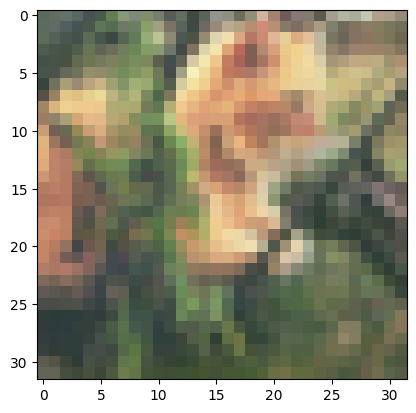

In [11]:
plt.imshow(image[0].permute(1, 2, 0))

In [8]:
from gan_model import ConditionalGenerator

generator = ConditionalGenerator()

/Users/sohumgautam/Documents/FII/nexus_coursework/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from huggingface_hub import snapshot_download
import torch
from gan_model import ConditionalGenerator, ConditionalDiscriminator

# Download the entire repository
local_dir = snapshot_download(
    repo_id="sohumgautam/cifar_gan_model",
    local_dir="./downloaded_model"
)

# Load models from local directory
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = ConditionalGenerator(latent_dim=100, num_classes=10)
generator.load_state_dict(torch.load(f"{local_dir}/generator.pth", map_location=device))
generator.to(device)
generator.eval()

ModuleNotFoundError: No module named 'huggingface_hub'

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create generator
generator = ConditionalGenerator(latent_dim=100, num_classes=10)

# Load checkpoint if available (otherwise will use untrained weights)
checkpoint_path = 'checkpoints/cgan_generator_epoch100.pth'  # Change to your path
generator.load_state_dict(torch.load(checkpoint_path, map_location=device, weights_only=False))

generator.to(device)
generator.eval()

# CIFAR-10 class names
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a class (0-9)
class_idx = 5  # Generate a cat (change to any number 0-9)
print(f"Generating a {cifar_classes[class_idx]}")

# Generate one image
with torch.no_grad():
    # Create random noise
    z = torch.randn(1, 100, device=device)
    
    # Create class label
    label = torch.tensor([class_idx], device=device)
    
    # Generate image
    fake_image = generator(z, label)
    
    # Convert from [-1,1] to [0,1] range
    fake_image = fake_image * 0.5 + 0.5

# Display image
plt.figure(figsize=(3, 3))
plt.imshow(fake_image[0].cpu().permute(1, 2, 0))
plt.title(f"Generated {cifar_classes[class_idx]}")
plt.axis('off')
plt.show()

UnpicklingError: invalid load key, 'v'.